## AdaGrad (Adaptive Gradient)

In [1]:
from IPython.display import Image

Vectorization form:

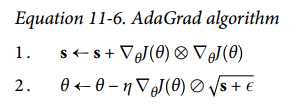

In [2]:
Image(filename='images/adagrad-vectorization.png')

Non-vectorization form:

In [3]:
Image(filename='images/adagrad-nonvectorization-1.png')

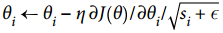

In [4]:
Image(filename='images/adagrad-nonvectorization-2.png')

The **AdaGrad** algorithm works by scaling down the gradient vector along the steepest dimensions.

- The algorithm maintains a vector s which consists of square of gradients (obtained by using element-wist multiplication of gradients). In other words, each element s<sub>i</sub> accumulates the squares of the partial derivative of the cost function with regard to parameter θ<sub>i</sub>. If the cost function is steep along the i<sup>th</sup> dimension (bigger derivative), then s<sub>i</sub> will get larger after each iteration.

- The second step of the algorithm is almost identical to vanilla Gradient Descent with one big difference. The gradient vector is scaled down by a factor of `sqrt(s + ε)` (obtained by using element-wise division). Epsilon is called the smoothing term which is used to prevent division by zero (usually take the value of 10<sup>-10</sup>). The equivalent non-vectorized form is shown in above figure.

The general idea of this algorithm is that it decays the learning rate faster for steep dimension and lower for dimension with gentler slopes. This process is called **Adaptive Learning Rate**. One benefit of this approach is that it requires much less tuning of the learning rate hyperparameter.

*Note that this algorithm is not good when training neural networks as it often stops too early. Specifically, the learning rate gets scaled down so much that the algorithm ends up stopping before reaching the global minimum. Therefore, we should not use this algorithm to train neural networks (it may be suitable for simple tasks like Linear Regression)*

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
z = np.linspace(-5, 5, 200)
tf.reset_default_graph()
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

In [7]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [8]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [9]:
with tf.name_scope("loss"):
    xen = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xen, name="loss")

In [10]:
with tf.name_scope("train"):
    optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [11]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [12]:
init = tf.global_variables_initializer()

In [13]:
n_epochs = 100
batch_size = 100
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(mnist.test.labels) // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.9 Test accuracy: 0.8592
1 Train accuracy: 0.9 Test accuracy: 0.8861
2 Train accuracy: 0.89 Test accuracy: 0.8954
3 Train accuracy: 0.94 Test accuracy: 0.9
4 Train accuracy: 0.95 Test accuracy: 0.9093
5 Train accuracy: 0.9 Test accuracy: 0.9107
6 Train accuracy: 0.89 Test accuracy: 0.9139
7 Train accuracy: 0.92 Test accuracy: 0.9169
8 Train accuracy: 0.94 Test accuracy: 0.9182
9 Train accuracy: 0.94 Test accuracy: 0.9185
10 Train accuracy: 0.95 Test accuracy: 0.9202
11 Train accuracy: 0.91 Test accuracy: 0.9219
12 Train accuracy: 0.88 Test accuracy: 0.9214
13 Train accuracy: 0.9 Test accuracy: 0.9248
14 Train accuracy: 0.94 Test accuracy: 0.9249
15 Train accuracy: 0.92 Test accuracy: 0.9275
16 Train accuracy: 0.94 Test accuracy: 0.9279
17 Train accuracy: 0.93 Test accuracy: 0.931
18 Train accuracy: 0.92 Test accuracy: 0.9286
19 Train accuracy: 0.95 Test accuracy: 0.9317
20 Train accuracy: 0.91 Test accuracy: 0.9337
21 Train accuracy: 0.95 Test accuracy: 0.9325
22 Tra